In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
X= df.drop('label', axis= 1)
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [7]:
df.shape

(20800, 5)

In [8]:
df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [10]:
# checking null values in %
tab_info= pd.DataFrame(df.dtypes).T.rename(index= {0: 'column type'})
#print(tab_info)
tab_info= tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index= {0:'null values'}))
tab_info= tab_info.append(pd.DataFrame((df.isnull().sum()/df.shape[0])*100).T.rename(index= {0:'null values in %'}))
tab_info

,id,title,author,text,label
column type,int64,object,object,object,int64
null values,0,558,1957,39,0
null values in %,0,2.68269,9.40865,0.1875,0


In [11]:
df.author.nunique()

4201

In [12]:
# checking 10 common author

df.author.value_counts()[:10]

Pam Key                243
admin                  193
Jerome Hudson          166
Charlie Spiering       141
John Hayward           140
Katherine Rodriguez    124
Warner Todd Huston     122
Ian Hanchett           119
Breitbart News         118
Daniel Nussbaum        112
Name: author, dtype: int64

In [13]:
# dropping all null rows
df= df.dropna()
df.shape

(18285, 5)

In [14]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [15]:
messages= df.copy()
messages= messages.reset_index(drop=True)
messages

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
18280,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
18281,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
18282,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
18283,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [16]:
messages.title[1:5]

1    FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                    Why the Truth Might Get You Fired
3    15 Civilians Killed In Single US Airstrike Hav...
4    Iranian woman jailed for fictional unpublished...
Name: title, dtype: object

In [17]:
len(messages)

18285

In [18]:
# classification will be based on title
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
corpus= []
ps= PorterStemmer()
for i in range(0,len(messages)):
    review= re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review= review.lower()
    review= review.split()
    review= [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review= ' '.join(review)
    corpus.append(review)
    

In [19]:
len(corpus)

18285

In [20]:
corpus_df= pd.Series(corpus)
corpus_df.shape

(18285,)

In [21]:
# Target variable

y= df.label

In [22]:
# splitting into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corpus_df, y, test_size=0.33, random_state=0)

In [45]:
X_train

8321      neon ak young russian gun celebr halloween photo
15615          genet modifi crop u fail deliv expect yield
7688     iphon wireless headphon analyz appl announc ne...
12330    defens board white hous block navi china sea w...
345      trump aid stephen miller u absolut sovereign r...
                               ...                        
9225       see dem accept foreign cash disrupt trump ralli
13123    hillari healthcar fix expos million american e...
9845     twitter allow sick disgust liber tweet assassi...
10799                 great stori noth polit new york time
2732     gay journalist came conserv shout portland sta...
Length: 12250, dtype: object

In [46]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12250,)
(6035,)
(12250,)
(6035,)


In [47]:
cv= CountVectorizer(max_features= 5000, ngram_range=(1,3))
cv= cv.fit(X_train)
train_data= cv.transform(X_train).toarray() # converting csr matrix(sparse) to array
train_data.shape

(12250, 5000)

In [48]:
train_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [49]:
# Show converted feature (word)
cv.get_feature_names()[:20]

['ab',
 'abandon',
 'abc',
 'abc news',
 'abduct',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accident']

In [50]:
# show ALgo parameter
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [53]:
# converting into dataframe to check each value 
count_df= pd.DataFrame(train_data, columns=cv.get_feature_names())

In [54]:
count_df.head()

,ab,abandon,abc,abc news,abduct,abedin,abl,abort,abroad,absolut,...,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# applying same countvectorizer in test data
test_data= cv.transform(X_test).toarray()
test_data.shape

(6035, 5000)

In [32]:
test_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
# Use this confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [34]:
# MultinomialMB Algorithm

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
classifier= MultinomialNB()

accuracy: 0.899
Confusion matrix, without normalization


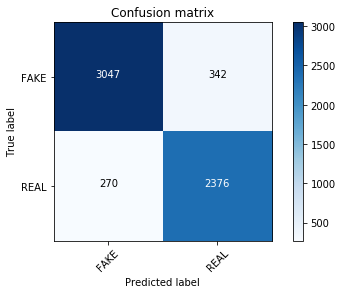

In [35]:
import itertools

classifier.fit(train_data, y_train)
pred= classifier.predict(test_data)
score= accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)
cm= confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [36]:
# Mutlinomial with Hyperparameter (alpha)

for alpha in np.arange(0,1,0.1):
    classifier= MultinomialNB(alpha=alpha)
    classifier.fit(train_data,y_train)
    pred= classifier.predict(test_data)
    score= accuracy_score(y_test,pred)
    print(f'Alpha:{alpha} having score: {score}')

C:\Users\egoeshu\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha:0.0 having score: 0.891797845898923
Alpha:0.1 having score: 0.8985915492957747
Alpha:0.2 having score: 0.8990886495443248
Alpha:0.30000000000000004 having score: 0.8992543496271748
Alpha:0.4 having score: 0.8990886495443248
Alpha:0.5 having score: 0.8987572493786247
Alpha:0.6000000000000001 having score: 0.8990886495443248
Alpha:0.7000000000000001 having score: 0.8987572493786247
Alpha:0.8 having score: 0.8980944490472246
Alpha:0.9 having score: 0.8984258492129246


In [37]:
# logisitic regression

from sklearn.linear_model import LogisticRegression
logitic= LogisticRegression()
logitic.fit(train_data,y_train)
logitic.predict(test_data)
score= accuracy_score(y_test, pred)
score

0.8984258492129246

In [38]:
len(cv.get_feature_names())

5000

In [ ]:
classifier.coef_[0]

In [40]:
# To identif the fakest word, the more -ve value, more fake word. size is 5000

print(classifier.coef_.shape)
print(classifier.coef_[0].shape)

(1, 5000)
(5000,)


In [41]:
# To get 20 most real words
sorted(zip(classifier.coef_[0], cv.get_feature_names()), reverse=True)[:20]

[(-4.007231403486374, 'trump'),
 (-4.29495494132493, 'hillari'),
 (-4.4034718679429075, 'clinton'),
 (-4.907051973090124, 'elect'),
 (-5.1836808477791445, 'new'),
 (-5.241812613230156, 'comment'),
 (-5.281050427855019, 'video'),
 (-5.3938990149994, 'war'),
 (-5.4039041009603626, 'us'),
 (-5.419101961869794, 'hillari clinton'),
 (-5.424219680306774, 'fbi'),
 (-5.487766731423469, 'vote'),
 (-5.5733377227367935, 'email'),
 (-5.58532108962389, 'world'),
 (-5.641097627081302, 'obama'),
 (-5.741583702654292, 'donald'),
 (-5.770177502021033, 'donald trump'),
 (-5.792172523606579, 'russia'),
 (-5.8533069120999475, 'day'),
 (-5.869192869688757, 'america')]

In [42]:
# To get 20 most fake words
sorted(zip(classifier.coef_[0], cv.get_feature_names()))[:20]

[(-10.802066802478116, 'abroad'),
 (-10.802066802478116, 'abus new'),
 (-10.802066802478116, 'abus new york'),
 (-10.802066802478116, 'acosta'),
 (-10.802066802478116, 'act new'),
 (-10.802066802478116, 'act new york'),
 (-10.802066802478116, 'address breitbart'),
 (-10.802066802478116, 'advic'),
 (-10.802066802478116, 'advis new'),
 (-10.802066802478116, 'advis new york'),
 (-10.802066802478116, 'afford care'),
 (-10.802066802478116, 'afford care act'),
 (-10.802066802478116, 'age new'),
 (-10.802066802478116, 'age new york'),
 (-10.802066802478116, 'ail'),
 (-10.802066802478116, 'aleppo new'),
 (-10.802066802478116, 'aleppo new york'),
 (-10.802066802478116, 'ali'),
 (-10.802066802478116, 'america breitbart'),
 (-10.802066802478116, 'america new york')]